<a href="https://colab.research.google.com/github/Saranpornuppa/CS246_Data-Visualization-Project/blob/main/Transportation_%26_Logistic_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transportation & Logistic Industry



##IMPORT LIBRARY & DATA

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import ConnectionPatch

import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# import thammasat university location
url_loc = 'https://drive.google.com/file/d/1T-Vvl3j4luvfOVTRFDRKS0gAjl53fUy3/view?usp=sharing' #csv link
file_id_loc = url_loc.split('/')[-2]
dwn_url_loc = 'https://drive.google.com/uc?id=' + file_id_loc

location = pd.read_csv(dwn_url_loc)
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    83 non-null     object 
 1   lat     83 non-null     float64
 2   lon     83 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
# import google form data
url_form = 'https://drive.google.com/file/d/1C6ZkrNWkzfH-5rP-SViztL1YihSKMU9n/view?usp=sharing' #csv link
file_id_form = url_form.split('/')[-2]
dwn_url_form = 'https://drive.google.com/uc?id=' + file_id_form

df = pd.read_csv(dwn_url_form)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 35 columns):
 #   Column                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                        --------------  ----- 
 0   Timestamp                                                                                                                                                     203 non-null    object
 1   E-mail (dome.tu.ac.th เท่านั้น)                                                                                                                               203 non-null    object
 2   เพศ                                                                                                                                               

##DOWNLOAD FONT FAMILY TO ENVIRONMENT



In [ ]:
#download thai fontfamily
!wget -q https://github.com/Viewkup/Fonts-Storage/raw/main/Noto_Sans_Thai.zip
!unzip "Noto_Sans_Thai.zip"

Archive:  Noto_Sans_Thai.zip
  inflating: OFL.txt                 
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Thin.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-ExtraLight.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Light.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Regular.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Medium.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-SemiBold.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Bold.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-ExtraBold.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Black.ttf  
  inflating: static/NotoSansThai_Condensed/NotoSansThai_Condensed-Thin.ttf  
  inflating: static/NotoSansThai_Condensed/NotoSans

In [ ]:
# set up font
path = '/content/static/NotoSansThai/NotoSansThai-Regular.ttf'
mpl.font_manager.fontManager.addfont(path)
fontname = 'Noto Sans Thai'
mpl.rc('font',family=fontname, size=15)

##DATA CLEANSING

In [ ]:
df = df.drop(df.iloc[ :, 0:2], axis=1)

df['คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด '] = df['คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด '].replace([
    '1A (สถานี EV(ศูนย์ประชุม) - โรงอาหาร SC - โรงอาหาร Green - หอพักโซน A-B-C - ตึกคณะสังคมศาสตร์/ศูนย์กีฬา - สถานีEV(เดินรถทางเดียว))',
    '1B (สถานี EV(ศูนย์ประชุม) - ศูนย์กีฬา/ตึกคณะสังคมศาสตร์ - หอพักโซน C-B-A - โรงอาหาร Green - โรงอาหาร SC -  สถานีEV(เดินรถทางเดียว))',
    '2 (สถานี EV(ศูนย์ประชุม) - โรงพยาบาลธรรมศาสตร์ - ตึกคณะสุขศึกษา - ตึกคณะวิทยาศาสตร์ - โรงอาหาร Green - โดมบริหาร - หอพักโซนA-B(กลับเส้นทางเดิม))',
    '3 (ประตูเชียงราก1 - ศูนย์กีฬา/ตึกคณะสังคมศาสตร์ - โรงอาหาร Green  - หอพักโซน A-B(กลับเส้นทางเดิม))',
    '5 (สถานี EV(ศูนย์ประชุม) - โรงอาหาร SC - ตึกคณะศึกษาศาสตร์ - ตึกคณะวิทยาศาสตร์ - ตึกคณะสุขศึกษา - โรงพยาบาลธรรมศาสตร์ - (กลับเส้นทางเดิม))'],
    ['1A', '1B', '2', '3', '5'])

df['คณะและสาขาที่ศึกษา'] = df['คณะและสาขาที่ศึกษา'].replace(regex={'(วิทยาศาสตร์และเทคโนโลยี.*)': 'วิทยาศาสตร์และเทคโนโลยี',
                                                                '(วิศวกรรมศาสตร์.*)': 'วิศวกรรมศาสตร์',
                                                                '(ศิลปศาสตร์.*)': 'ศิลปศาสตร์',
                                                                '(รัฐศาสตร์.*)': 'รัฐศาสตร์',
                                                                '(สาธารณสุขศาสตร์.*)': 'สาธารณสุขศาสตร์',
                                                                '(สังคมวิทยาและมานุษยวิทยา.*)': 'สังคมวิทยาและมานุษยวิทยา',
                                                                '(เภสัชศาสตร์.*)': 'เภสัชศาสตร์',
                                                                '(สถาบันเทคโนโลยีนานาชาติสิรินธร.*)': 'สถาบันเทคโนโลยีนานาชาติสิรินธร',
                                                                '(สังคมวิทยาและมานุษยวิทยา.*)': 'สังคมวิทยาและมานุษยวิทยา',
                                                                '(สถาปัตยกรรมศาสตร์และการผังเมือง.*)': 'สถาปัตยกรรมศาสตร์และการผังเมือง',
                                                                '(สหเวชศาสตร์.*)': 'สหเวชศาสตร์',
                                                                '(แพทยศาสตร์.*)': 'แพทยศาสตร์',
                                                                '(วารสารศาสตร์และสื่อสารมวลชน.*)': 'วารสารศาสตร์และสื่อสารมวลชน',
                                                                '(พาณิชยศาสตร์และการบัญชี.*)': 'พาณิชยศาสตร์และการบัญชี',
                                                                '(นิติศาสตร์.*)': 'นิติศาสตร์',
                                                                '(สังคมสงเคราะห์ศาสตร์.*)': 'สังคมสงเคราะห์ศาสตร์',
                                                                '(วารสารศาสตร์และสื่อสารมวลชน.*)': 'วารสารศาสตร์และสื่อสารมวลชน',
                                                                '(เศรษฐศาสตร์.*)': 'เศรษฐศาสตร์',
                                                                '(วิทยาการเรียนรู้และศึกษาศาสตร์.*)': 'วิทยาการเรียนรู้และศึกษาศาสตร์',
                                                                '(วิทยาลัยสหวิทยาการ.*)': 'วิทยาลัยสหวิทยาการ',
                                                                })

##DATA WRANGLING

In [ ]:
# group by EV usage
byUsed = df.groupby('คุณเคยนั่งรถ EV หรือไม่')

# Ever Use
everUsed = byUsed.get_group('เคย')
everUsed = everUsed.drop(everUsed.iloc[ :, 26:35], axis=1)
# Never use
neverUsed = byUsed.get_group('ไม่เคย')
neverUsed = neverUsed.drop(neverUsed.iloc[ :, 11:26], axis=1)
neverUsed = neverUsed.drop(['คุณนั่งรถ EV กี่ครั้งต่อวัน', 'คุณนั่งรถ EV กี่ครั้งต่อสัปดาห์'], axis=1)

print(everUsed.info())
print('===========================================================')
print(neverUsed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 202
Data columns (total 26 columns):
 #   Column                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                        --------------  ----- 
 0   เพศ                                                                                                                                                           186 non-null    object
 1   รหัสนักศึกษา (2 ตัวแรก)                                                                                                                                       186 non-null    int64 
 2   คณะและสาขาที่ศึกษา                                                                                                                                

In [ ]:
# location = pd.read_csv(dwn_url_loc)
location.insert(loc=len(location.columns), column="begin", value=0)
location.insert(loc=len(location.columns), column="end", value=0)

begin = df.groupby('คุณเริ่มต้นเดินทางจากจุดไหนมากที่สุด').size()
end = df.groupby('ปลายทางที่คุณเลือกเดินทางไปถึงมากที่สุด').size()

location.loc[location['Name'].isin(begin.index), 'begin'] = begin.values
location.loc[location['Name'].isin(end.index), 'end'] = end.values
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    83 non-null     object 
 1   lat     83 non-null     float64
 2   lon     83 non-null     float64
 3   begin   83 non-null     int64  
 4   end     83 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 3.4+ KB


In [ ]:
# จุดรอรถ EV ที่ต้องการให้ปรับปรุง
change = df['คุณอยากให้ปรับปรุงจุดรอรถ EV ในที่ใดบ้าง (ตอบได้มากกว่า 1 ตัวเลือก)'].str.get_dummies(';').sum()
evStationData = {
    "station" : change.index,
    "lat" : [0, 0, 14.072360915977596, 14.07181900530834, 14.068022592624274, 14.072326177939441, 14.0698602678932, 14.066468705439402, 14.066641341192238,
             14.071974982208525, 14.066932855895175, 14.06580413887269, 14.07628133260709, 0, 14.07214158587741, 14.073657124044429, 14.073655715988421, 14.073254158400179, 14.069185479799916],
    "lon" : [0, 0, 100.60704711956468, 100.6041803654163, 100.60169377505822, 100.61270253608447, 100.605954761732, 100.60513834542736, 100.61005962946467,
             100.60285362058313, 100.61398464780247, 100.6005476012363, 100.5965999765513, 0, 100.6022301841012, 100.60169007580203, 100.61593976961466, 100.60158807390363, 100.6044667189985],
    "values" : change.values
}
evStation = pd.DataFrame(data=evStationData)
zeroIndex = evStation[evStation['lat'] == 0].index
evStation = evStation.drop(zeroIndex)

# จุดรอรถ EV ที่นักศึกษาใช้บ่อย
use = df['คุณใช้บริการรถ EV ในจุดรอรถที่ใดบ้าง (ตอบได้มากกว่า 1 ตัวเลือก)'].str.get_dummies(';').sum()
stationUseData = {
    "station" : use.index,
    "lat" : [14.076390241506326, 14.070120748969746, 14.072360915977596, 14.068022592624274, 14.072326177939441, 14.069860, 14.06646870543940, 14.066641341192238, 0, 14.066932855895175,
             14.06580413887269, 14.075321728328918, 14.067419452419108, 14.07628133260709, 14.071235218523064, 14.073295362342725, 14.073655715988421, 14.073254158400179, 14.069185479799916],
    "lon" : [100.59729205874119, 100.60769830749692, 100.60704711956468, 100.60169377505822, 100.61270253608447, 100.60595, 100.605954761732, 100.61005962946467, 0, 100.61398464780247,
             100.6005476012363, 100.60169095856622, 100.60916691003234, 100.5965999765513, 100.60172004703314, 100.60175427865298, 100.61593976961466, 100.60158807390363, 100.6044667189985],
    "values" : use.values
}
stationUse = pd.DataFrame(data=stationUseData)
zeroIndex = stationUse[stationUse['lat'] == 0].index
stationUse = stationUse.drop(zeroIndex)

##DATA VISUALIZATION

In [ ]:
# set the font globally
font = fm.FontProperties(family=fontname, size=16)

fontHead = {'fontsize': 16,
            'fontweight' : 'bold'}

legendProp = {'family':fontname,
             'size': 13}

prop = {'family':fontname,
         'fontsize': 13}

fontdictTop = {'fontsize': 8,
            'weight': 'bold',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'};

fontdictInner = {'fontsize': 8,
            'weight': 'bold',
            'color': 'white',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'};

##ส่วนที่ 1 ข้อมูลทั่วไป

In [ ]:
Gender = df.groupby('เพศ')
Gender = Gender.size()
print(Gender)

fig = go.Figure(go.Pie(
    values=Gender.values,
    labels=Gender.index,
    texttemplate = "%{label}: %{value} <br>(%{percent})",
    textposition = "outside",
    hole=0.4,
    marker=dict(
        colors=['#FCB6D0', '#B6E3E9', '#FBDDA9','#B6DCB6']
    )
))

fig.update_layout(
    title={
        'text': "จำนวนนักศึกษามหาวิทยาลัยธรรมศาสตร์แบ่งตามเพศ",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    height=500, width=700,legend=dict(
        title="เพศ",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)
fig.show()

เพศ
LGBTQIA+     16
ชาย          68
หญิง        116
ไม่ระบุ       3
dtype: int64


In [ ]:
year = df.groupby('รหัสนักศึกษา (2 ตัวแรก)')
year = year.size()
print(year)

fig = go.Figure(go.Pie(
    values=year.values,
    labels=year.index,
    texttemplate = "%{value} <br>(%{percent})",
    textposition = "outside",
    marker=dict(
        colors=['#D4C86C', '#9EC5D1', '#F0EFE6','#B8B2A2','#E6AABF']
    )
))

fig.update_layout(
    title={
        'text': "จำนวนนักศึกษามหาวิทยาลัยธรรมศาสตร์แบ่งตามรหัสนักศึกษา (2 ตัวแรก)",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    height=500, width=700,legend=dict(
        title="รหัสนักศึกษา (2 ตัวแรก)",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)
fig.show()

รหัสนักศึกษา (2 ตัวแรก)
61     1
62    59
63    28
64    71
65    44
dtype: int64


In [ ]:
faculty = df.groupby('คณะและสาขาที่ศึกษา')
faculty = faculty.size()
print(faculty)

fig = go.Figure(go.Pie(
    values=faculty.values,
    labels=faculty.index,
    texttemplate = "%{value} <br>(%{percent})",
    textposition = "outside",
    marker=dict(
        colors=['#E1FEFE', '#E7DCFC','#F8D5F8', '#FAE0D8', '#F0F4BF','#DFE1BE', '#D0F4DE','#C0E4F6','#FFBBDA','#E8CFF8','#EEE4E1', '#E6BEAE', '#E8E8E9','#FBCCC2','#E8ABB5','#A8D1E7', '#FFF3D7', '#E5F9FE']
    )
))

fig.update_layout(
    title={
        'text': "จำนวนนักศึกษามหาวิทยาลัยธรรมศาสตร์แบ่งตามคณะที่ศึกษา",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    height=1000, width=1000,legend=dict(
        title="คณะที่ศึกษา",
        # orientation="h",
        yanchor="bottom",
        y=0.5,
        # xanchor="center",
        # x=0.5
    )
)
fig.show()

คณะและสาขาที่ศึกษา
นิติศาสตร์                          12
พาณิชยศาสตร์และการบัญชี             12
รัฐศาสตร์                            5
วารสารศาสตร์และสื่อสารมวลชน          1
วิทยาการเรียนรู้และศึกษาศาสตร์       1
วิทยาลัยสหวิทยาการ                   2
วิทยาศาสตร์และเทคโนโลยี            106
วิศวกรรมศาสตร์                      14
ศิลปศาสตร์                          12
สถาบันเทคโนโลยีนานาชาติสิรินธร       1
สถาปัตยกรรมศาสตร์และการผังเมือง      4
สหเวชศาสตร์                         10
สังคมวิทยาและมานุษยวิทยา             5
สังคมสงเคราะห์ศาสตร์                 4
สาธารณสุขศาสตร์                      6
เภสัชศาสตร์                          1
เศรษฐศาสตร์                          5
แพทยศาสตร์                           2
dtype: int64


In [ ]:
home= df.groupby('คุณพักอาศัยอยู่ที่ใด')
home= home.size()
print(home)

fig = go.Figure(go.Bar(
    y=home.values,
    x=home.index,
    text=[f"{100*count/len(df):.2f}%" for count in home],
    textposition = "inside",
    marker=dict(
        color=['#FBDDA9', '#B6E3E9', '#FCB6D0','#B6DCB6']
    )
))
fig.update_traces(texttemplate = "%{y} (%{text})",textposition = "outside")
fig.update_layout(
    title={
        'text': "จำนวนนักศึกษามหาวิทยาลัยธรรมศาสตร์แบ่งตามที่พักอาศัย",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="ที่พักอาศัย",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=500, width=700
)
fig.show()

คุณพักอาศัยอยู่ที่ใด
คอนโด         1
บ้าน         21
หอพักนอก    116
หอพักใน      65
dtype: int64


##ส่วนที่ 2 ภาพรวมการเดินทางของนักศึกษามหาวิทยาลัยธรรมศาสตร์

ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด
รถ EV                   32
รถจักรยาน               14
รถจักรยานยนต์ส่วนตัว    17
รถตู้ของทางหอพัก         1
รถตู้โดยสารประจำทาง     20
รถมอเตอไซต์รับจ้าง      32
รถยนต์ส่วนตัว           27
รถเมล์โดยสารประจำทาง    13
เดินเท้า                47
dtype: int64


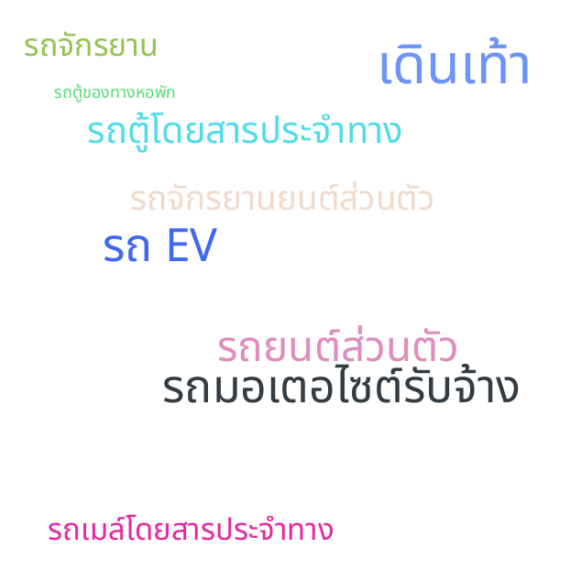

In [ ]:
# import plotly.express as px

# typetravel = df.groupby('ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด').size().reset_index(name='count')

# fig = px.scatter(typetravel, x="ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด", y="count",
#                  size="count", color="ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด",
#                  hover_name="ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด",
#                  title="แผนภูมิ Bubble Chart แสดงจำนวนนักศึกษามหาวิทยาลัยธรรมศาสตร์ที่ใช้ Application TU Around",
#                  labels={"ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด": "ประเภทการเดินทาง",
#                          "count": "จำนวน"},
#                  color_discrete_sequence=['#FA9189', '#FCAE7C', '#FFE699','#F9FFB5','#B3F5BC','#D6F6FF','#FED4E0','#E2CBF7','#D1BDFF'])

# typetravel= df.groupby('ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด')
# typetravel= typetravel.size()
# print(typetravel)
import random
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.font_manager as fm

typetravel= df.groupby('ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด')
typetravel= typetravel.size()
print(typetravel)
font = '/content/static/NotoSansThai/NotoSansThai-Regular.ttf'


text = dict(zip(typetravel.index, typetravel.values))

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple([random.randint(0, 255) for i in range(3)])

wordcloud = WordCloud(width=600, height=600, background_color='white',
                      font_path=font, font_step=5,
                      stopwords=set(STOPWORDS), max_font_size=60).generate_from_frequencies(text)

wordcloud.recolor(color_func=color_func)

plt.figure(figsize=(7.5, 5.5), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [ ]:
alltravel = df.groupby('ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด')
ttvalues = alltravel.size().values
ttlabels = alltravel.size().index

tt_val = ttvalues
tt_labels = ttlabels

colorsq=['#FA9189', '#FCAE7C', '#FFE699','#F9FFB5','#B3F5BC','#D6F6FF','#FED4E0','#E2CBF7','#D1BDFF']

fig = [
    go.Figure(go.Pie(
        labels=tt_labels,
        values=tt_val,
        texttemplate="%{label}: %{value} (%{percent})",
        textposition="outside",
        hole=0.4,
    )),
]

for i in fig:
  i.update_layout(
    font_family=fontname,
    height=500, width=1500
  )

fig[0].update_layout(title={
        'text': "การเดินทางไป/กลับมหาวิทยาลัยของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
                     colorway=colorsq,
                     legend=dict(
                         title="ประเภทการเดินทาง",
                         orientation="v"
                     ))

fig[0].show()

In [ ]:
changeLesson = df.groupby('ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด').size()
roundTrip = df.groupby('ส่วนใหญ่คุณเลือกเดินทางระหว่างเปลี่ยนคาบเรียนในมหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด').size()

colors=px.colors.qualitative.Set2

fig = go.Figure(data = [
    go.Bar(name='เดินทาง ไป/กลับ', x=changeLesson.index , y=changeLesson.values, text=changeLesson.values),
    go.Bar(name='เดินทางระหว่างเปลี่ยนคาบเรียน', x=roundTrip.index, y=roundTrip.values, text=roundTrip.values),
])

fig.update_traces(texttemplate = "%{y}", textposition = "outside")
fig.update_layout(
    title='การเดินทางไปกลับและเปลี่ยนคาบเรียนของนักศึกษามหาวิทยาลัยธรรมศาสตร์',
    yaxis_title="จำนวนนักศึกษา (คน)",
    xaxis_title="วิธีการเดินทาง",
    barmode='group',
    colorway=colors,
    xaxis={'categoryorder':'total descending'},
    height=600, width=1700,
    font_family=fontname
)
fig.update_layout(legend=dict(
    orientation="h",
    entrywidth=100,
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

In [ ]:
travelTypes = df.groupby('ส่วนใหญ่คุณเลือกเดินทางระหว่างเปลี่ยนคาบเรียนในมหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด')
ttvalues = travelTypes.size().values
ttlabels = travelTypes.size().index

target = 7
factor = travelTypes.get_group(ttlabels[target])
factor = factor['ปัจจัยใดที่มีผลต่อการตัดสินใจเลือกประเภทการเดินทางในมหาวิทยาลัย (ตอบ 3 ตัวเลือก)'].str.get_dummies(";").sum()

# pie chart parameters
tt_val = ttvalues
tt_labels = ttlabels

# bar chart parameters
f_val = factor
f_labels = f_val.index

colorsq=['#FA9189', '#FCAE7C', '#FFE699','#F9FFB5','#B3F5BC','#D6F6FF','#FED4E0','#E2CBF7','#D1BDFF']

pull = [0, 0, 0, 0, 0, 0, 0, 0]
pull[target] = 0.2

fig = [
    go.Figure(go.Pie(
        labels=tt_labels,
        values=tt_val,
        texttemplate="%{label}: %{value} (%{percent})",
        textposition="outside",
        hole=0.4,
        pull=pull
    )),

    go.Figure(go.Bar(
        y=f_labels,
        x=f_val,
        text=f_val,
        texttemplate="%{value}",
        orientation='h',
        marker=dict(color=colorsq[0])
    ))
]

for i in fig:
  i.update_layout(
    font_family=fontname,
    height=500, width=700
  )

fig[0].update_layout(title="การเดินทางระหว่างเปลี่ยนคาบเรียนของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
                     colorway=colorsq,
                     legend=dict(
                         title="ประเภทการเดินทาง",
                         orientation="v"
                     ))
fig[1].update_layout(title="ปัจจัยในการตัดสินใจเลือกการเดินทางในมหาวิทยาลัยของนักศึกษาที่เลือก " + tt_labels[target],
                      xaxis_title="จำนวนนักศึกษา (คน)",
                      yaxis_title="ปัจจัยในการตัดสินใจเลือกการเดินทาง",
                      yaxis={'categoryorder':'total ascending'})

fig[0].show()
fig[1].show()

In [ ]:
cost= df.groupby('ส่วนใหญ่คุณมีอัตราค่าใช้จ่ายทั้งหมดสำหรับการเดินทางในแต่ละวันประมาณเท่าใด')
cost= cost.size()
print(cost)

fig = go.Figure(go.Bar(
    y=cost.values,
    x=cost.index,
    text=[f"{100*count/len(df):.2f}%" for count in cost],
    textposition = "inside",
    marker=dict(
        color=['#D4C86C', '#9EC5D1', '#F0EFE6','#B8B2A2','#E6AABF']
    )
))
fig.update_traces(texttemplate = "%{y} (%{text})",textposition = "outside")
fig.update_layout(
    title={
        'text': "อัตราค่าใช้จ่ายทั้งหมดสำหรับการเดินทางในแต่ละวันของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="อัตราค่าใช้จ่าย (บาท/วัน)",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=500, width=1000
)

fig.show()

ส่วนใหญ่คุณมีอัตราค่าใช้จ่ายทั้งหมดสำหรับการเดินทางในแต่ละวันประมาณเท่าใด
0 บาท               59
1 - 50 บาท         110
51 - 100 บาท        22
มากกว่า 100 บาท     12
dtype: int64


In [ ]:
numberEVandtime = df.groupby(["ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด", "คุณพักอาศัยอยู่ที่ใด"])["คุณพักอาศัยอยู่ที่ใด"].count().reset_index(name='count')

fig = px.bar(numberEVandtime, x=numberEVandtime["ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด"], y='count', color='คุณพักอาศัยอยู่ที่ใด',
             text=[f"{100*count/len(df):.2f}%" for count in numberEVandtime['count']], barmode='stack', color_discrete_sequence=['#FCB6D0', '#B6E3E9', '#FBDDA9','#B6DCB6'])

fig.update_traces(texttemplate = "%{y} (%{text})", textposition = "inside")
fig.update_layout(
    title={
        'text': "จำนวนประเภทการเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ของนักศึกษามหาวิทยาลัยธรรมศาสตร์จำแนกตามที่อยู่อาศัย",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="ประเภทการเดินทาง",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=1000, width=1000,
    legend_title="ที่อยู่อาศัย"
)

fig.show()

In [ ]:
numberEVandtime = df.groupby(["ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด", "ส่วนใหญ่คุณมีอัตราค่าใช้จ่ายทั้งหมดสำหรับการเดินทางในแต่ละวันประมาณเท่าใด"])["ส่วนใหญ่คุณมีอัตราค่าใช้จ่ายทั้งหมดสำหรับการเดินทางในแต่ละวันประมาณเท่าใด"].count().reset_index(name='count')

fig = px.bar(numberEVandtime, x=numberEVandtime["ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด"], y='count', color='ส่วนใหญ่คุณมีอัตราค่าใช้จ่ายทั้งหมดสำหรับการเดินทางในแต่ละวันประมาณเท่าใด',
             text=[f"{100*count/len(df):.2f}%" for count in numberEVandtime['count']], barmode='stack', color_discrete_sequence=['#FCB6D0', '#B6E3E9', '#FBDDA9','#B6DCB6'])

fig.update_traces(texttemplate = "%{y} (%{text})", textposition = "inside")
fig.update_layout(
    title={
        'text': "จำนวนประเภทการเดินทาง ไป/กลับ มหาวิทยาลัยของนักศึกษามหาวิทยาลัยธรรมศาสตร์จำแนกตามอัตราค่าใช้จ่ายทั้งหมดสำหรับการเดินทางในแต่ละวัน",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="ประเภทการเดินทาง",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=1000, width=1200,
    legend_title="อัตราค่าใช้จ่ายสำหรับการเดินทาง (บาท/วัน)"
)

fig.show()

In [ ]:
numberEVandtime = df.groupby(["ส่วนใหญ่คุณมีอัตราค่าใช้จ่ายทั้งหมดสำหรับการเดินทางในแต่ละวันประมาณเท่าใด", "คุณพักอาศัยอยู่ที่ใด"])["คุณพักอาศัยอยู่ที่ใด"].count().reset_index(name='count')

fig = px.bar(numberEVandtime, x=numberEVandtime["ส่วนใหญ่คุณมีอัตราค่าใช้จ่ายทั้งหมดสำหรับการเดินทางในแต่ละวันประมาณเท่าใด"], y='count', color='คุณพักอาศัยอยู่ที่ใด',
             text=[f"{100*count/len(df):.2f}%" for count in numberEVandtime['count']], barmode='group', color_discrete_sequence=['#FCB6D0', '#B6E3E9', '#FBDDA9','#B6DCB6'])

fig.update_traces(texttemplate = "%{y} (%{text})", textposition = "outside")
fig.update_layout(
    title={
        'text': "จำนวนอัตราค่าใช้จ่ายทั้งหมดสำหรับการเดินทางในแต่ละวันของนักศึกษามหาวิทยาลัยธรรมศาสตร์จำแนกตามที่อยู่อาศัย",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="อัตราค่าใช้จ่ายสำหรับการเดินทาง (บาท/วัน)",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=500, width=1000,
    legend_title="ที่อยู่อาศัย"
)

fig.show()

In [ ]:
overallFactor = df['ปัจจัยใดที่มีผลต่อการตัดสินใจเลือกประเภทการเดินทางในมหาวิทยาลัย (ตอบ 3 ตัวเลือก)'].str.get_dummies(";").sum()

colors=px.colors.qualitative.Set3
of_vals = overallFactor.values
of_labels = overallFactor.index
fig = go.Figure(go.Pie(
        labels=of_labels,
        values=of_vals,
        texttemplate="%{label}: %{value} (%{percent})",
        textposition="outside",
))

fig.update_layout(
    title="ปัจจัยในการเลือกการเดินทางของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
    font_family=fontname,
    colorway=colors,
    height=600, width=1000
)

fig.update_layout(
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.5,
    xanchor="right",
    x=1.0
))

fig.show()

In [ ]:
# plt.figure(figsize=(3,4))
# plt.style.use('default')

# width = 0.5
# ind = evUsage.index.values
# val = evUsage.values

# pc =  val / val.sum()  * 100

# for index, value in enumerate(evUsage):
#      plt.text(index, value + 1, str("%i" %val[index]), fontdict = fontdictTop)
# for index, value in enumerate(evUsage):
#      plt.text(index, value - 5, str(("%.2f" %pc[index]) + "%"), fontdict = fontdictInner)

# plt.bar(ind, val, width=width)
# plt.title('ประสบการณ์การใช้งานรถ EV ของนักศึกษามหาวิทยาลัยธรรมศาสตร์', fontname=fontname)
# plt.xlabel("เคย/ไม่ เคยใช้รถ EV",fontname=fontname)
# plt.ylabel("จำนวนนักศึกษา (คน)",fontname=fontname)
# plt.xticks(ha='center', fontname=fontname)
# plt.show()

evUsage = byUsed.size()

colors=px.colors.qualitative.Pastel1

fig = go.Figure(go.Pie(
    values=evUsage.values,
    labels=evUsage.index,
    texttemplate="%{label}: %{value} คน <br>(%{percent})",
    textposition="outside",
    hole=0.4
    ,pull=0.1
))

fig.update_layout(
    title={
        'text': "ประสบการณ์การใช้งานรถ EV ของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    font_family=fontname,
    colorway=[colors[1], colors[0]],
    height=500, width=700
)
fig.show()

In [ ]:
#ชั้นปี+เคยไม่เคย
EVandSD = df[df['คุณเคยนั่งรถ EV หรือไม่'] == 'เคย']['รหัสนักศึกษา (2 ตัวแรก)'].reset_index().drop(columns=['index'])
notEVandSD = df[df['คุณเคยนั่งรถ EV หรือไม่'] == 'ไม่เคย']['รหัสนักศึกษา (2 ตัวแรก)'].reset_index().drop(columns=['index'])

EVandSD = EVandSD.groupby(['รหัสนักศึกษา (2 ตัวแรก)']).size().reset_index(name='เคยนั่งรถ EV')
EVandSD = EVandSD.sort_values(by=['รหัสนักศึกษา (2 ตัวแรก)'])
notEVandSD = notEVandSD.groupby(['รหัสนักศึกษา (2 ตัวแรก)']).size().reset_index(name='ไม่เคยนั่งรถ EV')
notEVandSD = notEVandSD.sort_values(by=['รหัสนักศึกษา (2 ตัวแรก)'])

print(EVandSD)
print(notEVandSD)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=EVandSD['รหัสนักศึกษา (2 ตัวแรก)'],
    y=EVandSD['เคยนั่งรถ EV'],
    name='เคยนั่งรถ EV',
    text=[f"{100*y/len(df):.2f}%" for y in EVandSD['เคยนั่งรถ EV']]
))

fig.add_trace(go.Bar(
    x=notEVandSD['รหัสนักศึกษา (2 ตัวแรก)'],
    y=notEVandSD['ไม่เคยนั่งรถ EV'],
    name='ไม่เคยนั่งรถ EV',
    text=[f"{100*y/len(df):.2f}%" for y in notEVandSD['ไม่เคยนั่งรถ EV'] ]
))
fig.update_traces(texttemplate = "%{y} (%{text})", textposition = "outside")

fig.update_layout(
    title={
        'text': "ประสบการณ์เคย/ไม่เคยนั่งรถ EV ของนักศึกษามหาวิทยาลัยธรรมศาสตร์แบ่งตามรหัสนักศึกษา",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="รหัสนักศึกษา (2 ตัวแรก)",
    yaxis_title="จำนวนนักศึกษา (คน)",
    colorway=[colors[1], colors[0]],
    height=500, width=1000,
    legend_title="ประสบการณ์นั่งรถ EV"
)

fig.show()

   รหัสนักศึกษา (2 ตัวแรก)  เคยนั่งรถ EV
0                       61             1
1                       62            54
2                       63            24
3                       64            66
4                       65            41
   รหัสนักศึกษา (2 ตัวแรก)  ไม่เคยนั่งรถ EV
0                       62                5
1                       63                4
2                       64                5
3                       65                3


##ส่วนที่ 3 นักศึกษามหาวิทยาลัยธรรมศาสตร์ที่เคยนั่งรถ EV

In [ ]:
EVtimes= df.groupby('คุณนั่งรถ EV กี่ครั้งต่อวัน')
EVtimes= EVtimes.size()
print(EVtimes)

labels = ['0 - 1 ครั้ง','2 - 3 ครั้ง','4 - 5 ครั้ง','มากกว่า 5 ครั้ง']
fig = go.Figure(go.Bar(
    y=EVtimes.values,
    x=EVtimes.index,
    text=[f"{100*count/len(df):.2f}%" for count in EVtimes],
    textposition = "auto",
    marker=dict(
        color=px.colors.sequential.Bluyl
    )
))
fig.update_traces(texttemplate = "%{y} (%{text})",textposition = "outside")
fig.update_layout(
    title={
        'text': "จำนวนครั้งที่ใช้รถ EV ต่อวันของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="จำนวนการใช้รถ EV (ครั้ง/วัน)",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=500, width=500
    # ,legend=dict(title="การใช้ TU Around", orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)
fig.update_xaxes(categoryorder="array", categoryarray=labels)
fig.show()

คุณนั่งรถ EV กี่ครั้งต่อวัน
0 - 1 ครั้ง        120
2 - 3 ครั้ง         53
4 - 5 ครั้ง          5
มากกว่า 5 ครั้ง      8
dtype: int64


In [ ]:
import random
import matplotlib.font_manager as fm
import plotly.express as px

typeEV = df.groupby('คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด ').size().reset_index(name='count')

ev_colors = {'1A': px.colors.qualitative.Plotly[0],
             '1B': px.colors.qualitative.Plotly[1],
             '2': px.colors.qualitative.Plotly[2],
             '3': px.colors.qualitative.Plotly[3],
             '5': px.colors.qualitative.Plotly[4]}
ev_names = {'1A': 'สายรถ 1A',
            '1B': 'สายรถ 1B',
            '2': 'สายรถ 2',
            '3': 'สายรถ 3',
            '5': 'สายรถ 5'}

typeEV['size'] = typeEV['count']
typeEV['color'] = typeEV['คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด '].replace(ev_colors)
typeEV['legend'] = typeEV['คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด '].replace(ev_names)


typeEV['x'] = [random.uniform(0, 1) for i in range(len(typeEV))]
typeEV['y'] = [random.uniform(0, 1) for i in range(len(typeEV))]

fig = px.scatter(typeEV, x='คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด ', y='y', size='size', color='color',
                 text='count', hover_name='คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด ',
                 hover_data={'x': False, 'y': False, 'size': False},
                 size_max=105, title='จำนวนการนั่งรถ EV ในแต่ละสายของนักศึกษามหาวิทยาลัยธรรมศาสตร์',
                 labels={'คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด': 'สายรถ EV', 'count': 'จำนวน'})

fig.update_traces(textposition='middle center')
fig.update_layout(legend_title_text='สายรถ EV',showlegend=False,width=800, plot_bgcolor='white')
fig.update_layout(title_x=0.5)

fig.update_xaxes(title_text='สายรถ EV')
fig.update_yaxes(showticklabels=False)
fig.show()

In [ ]:
typeEV= df.groupby('คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด ')
typeEV= typeEV.size()
print(typeEV)

fig = go.Figure(go.Pie(
    values=typeEV.values,
    labels=typeEV.index,
    texttemplate = "%{label}: %{value} <br>(%{percent})",
    textposition = "inside",
    marker=dict(
        colors=['#cdb4db', '#ffafcc', '#a2d2ff']
    )
))

fig.update_layout(
    title={
        'text': "จำนวนการนั่งรถ EV ในแต่ละสายของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    height=500, width=700,legend=dict(
        title="สายรถ EV",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)
fig.show()

คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด 
1A    26
1B    37
2     54
3     38
5     31
dtype: int64


In [ ]:
# Split the 'ช่วงเวลาในการใช้บริการรถ EV  (ตอบได้มากกว่า 1  ตัวเลือก)' column and explode it
EVgroupTime = df.groupby(["ช่วงเวลาในการใช้บริการรถ EV  (ตอบได้มากกว่า 1  ตัวเลือก)", "คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด "])["คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด "].count().reset_index(name='count')
time = EVgroupTime['ช่วงเวลาในการใช้บริการรถ EV  (ตอบได้มากกว่า 1  ตัวเลือก)'].str.split(';').explode()

# Count the occurrences of each value
time_counts = time.value_counts()

fig = go.Figure(go.Bar(
    x=time_counts.values,
    y=time_counts.index,
    text=time_counts.values,
    textposition='inside',
    marker_color='#9EC5D1',
    orientation='h',
    )
)

# Update the layout
fig.update_layout(
    title={
        'text': "ช่วงเวลาในการใช้บริการรถ EV",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="จำนวนนักศึกษา (คน)",
    yaxis_title="ช่วงเวลา",
    height=400,
    width=500,
    legend_title="คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด"
)

# Show the figure
fig.show()

In [ ]:
evWaitTime = everUsed.groupby('ระยะเวลาที่เคยรอรถ EV นานที่สุด').size()
vals = evWaitTime.values
labels = evWaitTime.index
colorsq = ['#F9FFB5', '#FA9189','#B3F5BC', '#D1BDFF']
fig = go.Figure(go.Pie(
    values=vals,
    labels=labels,
    texttemplate = "%{label}: %{value} <br>(%{percent})",
    textposition = "outside",
    marker=dict(
        colors=colorsq
    )
))

fig.update_layout(
    title={
        'text': "เวลาในการรอรถ EV ของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    height=500, width=700
)
fig.update_layout(
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.3,
    xanchor="right",
    x=1.0
))
fig.show()

In [ ]:
numberEVandtime = df.groupby(["คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด ", "ระยะเวลาที่เคยรอรถ EV นานที่สุด"])["ระยะเวลาที่เคยรอรถ EV นานที่สุด"].count().reset_index(name='count')

timeEV = ['น้อยกว่า 15 นาที','ระหว่าง 15 - 30 นาที','ระหว่าง 31 - 60 นาที','มากกว่า 60 นาที (1 ชั่วโมง)']
# timeEV = pd.Categorical(timeEV, categories=['น้อยกว่า 15 นาที','ระหว่าง 15 - 30 นาที','ระหว่าง 31 - 60 นาที','มากกว่า 60 นาที (1 ชั่วโมง)'], ordered=True)

colorsq = ['#F9FFB5', '#FA9189','#B3F5BC', '#D1BDFF']

fig = px.bar(numberEVandtime, x=numberEVandtime["คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด "], y='count', color='ระยะเวลาที่เคยรอรถ EV นานที่สุด',
             text=[f"{100*count/len(df):.2f}%" for count in numberEVandtime['count']], barmode='stack', color_discrete_sequence=colorsq)
fig.update_traces(texttemplate = "%{y} (%{text})", textposition = "inside")
fig.update_layout(
    title={
        'text': "จำนวนการนั่งรถ EV ในแต่ละสายของนักศึกษามหาวิทยาลัยธรรมศาสตร์จำแนกตามระยะเวลาที่รอรถ EV",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="สายรถ EV",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=800, width=800,
    legend_title="ระยะเวลาที่รอ EV"
)

fig.update_xaxes(categoryorder="array", categoryarray=timeEV)

fig.show()

In [ ]:
alltravel = df.groupby('ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด')
ttvalues = alltravel.size().values
ttlabels = alltravel.size().index

target_option = 'รถ EV'
target = ttlabels.get_loc(target_option)

factor = alltravel.get_group(ttlabels[target])
factor = factor['คุณนั่งรถ EV กี่ครั้งต่อวัน'].str.get_dummies(";").sum()

# pie chart parameters
tt_val = ttvalues
tt_labels = ttlabels

# bar chart parameters
f_val = factor
f_labels = f_val.index

colorsq=['#FA9189', '#FCAE7C', '#FFE699','#F9FFB5','#B3F5BC','#D6F6FF','#FED4E0','#E2CBF7','#D1BDFF']
labels =['0 - 1 ครั้ง','2 - 3 ครั้ง','4 - 5 ครั้ง','มากกว่า 5 ครั้ง']

pull = [0, 0, 0, 0, 0, 0, 0, 0]
pull[target] = 0.2

fig = [
    go.Figure(go.Pie(
        labels=tt_labels,
        values=tt_val,
        texttemplate="%{label}: %{value} (%{percent})",
        textposition="outside",
        hole=0.4,
        pull=pull
    )),
    go.Figure(go.Bar(
        x=f_labels,
        y=f_val,
        text=f_val,
        texttemplate="%{value}",
        orientation='v',
        marker=dict(color=colorsq[0])
    ))
]

for i in fig:
  i.update_layout(
    font_family=fontname
  )

fig[0].update_layout(title={
        'text': "การเดินทางไป/กลับมหาวิทยาลัยของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    colorway=colorsq,
    legend=dict(title="ประเภทการเดินทาง",orientation="v"),
    height=500, width=800)

fig[0].update_layout(
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.5,
    xanchor="right",
    x=1.0
))

fig[1].update_layout(title={
        'text': "ความถี่ในการใช้" + tt_labels[target] + " เดินทางไป/กลับมหาวิทยาลัย<br>ของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5},
                      yaxis_title="จำนวนนักศึกษา (คน)",
                      xaxis_title="จำนวนการใช้รถ EV (ครั้ง/วัน)",
                      xaxis={'categoryorder':'total ascending'},
                      height=500, width=500)

fig[0].show()
fig[1].show()

In [ ]:
evlineNfaculty = everUsed.groupby(["คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด ", "คณะและสาขาที่ศึกษา"])["คณะและสาขาที่ศึกษา"].count().reset_index(name='count')

fig = px.bar(evlineNfaculty, x=evlineNfaculty["คุณนั่งรถ EV สายหรือเส้นทางใดมากที่สุด "], y='count', color="คณะและสาขาที่ศึกษา",
             text=[f"{100*count/len(df):.2f}%" for count in evlineNfaculty['count']], color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_traces(texttemplate = "%{y} (%{text})", textposition = "inside")
fig.update_layout(
    title={
        'text': "จำนวนนักศึกษามหาวิทยาลัยธรรมศาสตร์ที่นั่งรถEVในแต่ละสายแบ่งตามคณะ",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="คณะและสาขาที่ศึกษา",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=900, width=900,
    legend_title="คณะ"
)

fig.show()

In [ ]:
scale = { '(มากที่สุด)': 5, '(มาก)': 4, '(ปานกลาง)': 3, '(น้อย)': 2, '(น้อยที่สุด)': 1 }
satisfication = everUsed.loc[: , ['ระดับความพึงพอใจในการใช้บริการรถ EV  [ด้านการขับขี่ของผู้ให้บริการ]',
                  'ระดับความพึงพอใจในการใช้บริการรถ EV  [ด้านความเหมาะสมของจุดรอรถ]',
                  'ระดับความพึงพอใจในการใช้บริการรถ EV  [ด้านสภาพและความสะอาดของรถ]',
                  'ระดับความพึงพอใจในการใช้บริการรถ EV  [ด้านการจัดการเส้นทางการวิ่งของรถ]',
                  'ระดับความพึงพอใจในการใช้บริการรถ EV  [ด้านระยะเวลาในการรอรถ]',
                  'ระดับความพึงพอใจในการใช้บริการรถ EV  [ความพึงพอใจต่อการใช้บริการรถ EV โดยรวม]']].replace(regex=scale)

labels = ['การขับขี่ของผู้ให้บริการ',
          'ความเหมาะสมของจุดรอรถ',
          'สภาพและความสะอาดของรถ',
          'การจัดการเส้นทางการวิ่งของรถ',
          'ระยะเวลาในการรอรถ',
          'โดยรวม']

vals = satisfication.mean()

fig = go.Figure(go.Bar(
        y=labels,
        x=vals,
        text=vals,
        texttemplate="%{value}",
        orientation='h',
        marker=dict(color=px.colors.qualitative.Pastel1),

    ))

fig.update_layout(
    font_family=fontname,
    height=500, width=700
)
fig.update_layout(title="ความพึงพอใจการใช้บริการรถ EV ในแต่ละด้านของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
                  xaxis_title="จำนวนนักศึกษา (คน)",
                  yaxis_title="หัวข้อความพึงพอใจ",
                  yaxis={'categoryorder':'total ascending'},
                  xaxis_range=[1,5],
                  xaxis = dict(
                      tickmode = "array",
                      tickvals = np.arange(len(vals))+1,
                      ticktext = ["1 (น้อยที่สุด)", '2', '3', '4', "5 (มากที่สุด)"]
                  )
)
fig.show()

In [ ]:
fig = [
       px.scatter_mapbox(evStation, lat="lat", lon="lon",
                         color="values",
                         color_continuous_scale=px.colors.sequential.deep,
                         size="values",
                         size_max=50,
                         hover_name="station",
                         hover_data=["values"],
                         text="station",
                         zoom=14.4, height=500, width=900
                         ),

      px.scatter_mapbox(stationUse, lat="lat", lon="lon",
                         color="values",
                         color_continuous_scale=px.colors.sequential.dense,
                         size="values",
                         size_max=50,
                         hover_name="station",
                         hover_data=["values"],
                         text="station",
                         zoom=14.4, height=500, width=900
                         )
    ]

for f in fig :
  f.update_layout(mapbox_style="carto-positron", #open-street-map
                  margin={"r":10, "t":42, "l":10, "b":10},
                  mapbox_bounds={"west": 100.592, "east": 100.62, "south": 14.06, "north": 14.08},
                  font_family="Noto Sans Thai"
                  )

fig[0].update_layout(title='จำนวนนักศึกษาที่ต้องการให้ปรับปรุงจุดรอรถ EV แต่ละจุดในมหาวิทยาลัยธรรมศาสตร์')
fig[0].update_traces(textposition='top center')
fig[1].update_layout(title='จำนวนนักศึกษาที่ใช้จุดรอรถ EV แต่ละจุดในมหาวิทยาลัยธรรมศาสตร์')
fig[1].update_traces(textposition='top center')
for f in fig :
  f.show()

In [ ]:
AppTU = df.groupby('คุณรู้จัก Application TU Around เพื่อช่วยในการเดินทางด้วยรถ EV หรือไม่')
AppTU = AppTU.size()
print(AppTU)

fig = go.Figure(go.Pie(
    values=AppTU.values,
    labels=AppTU.index,
    texttemplate = "%{label}: %{value} <br>(%{percent})",
    textposition = "inside",
    marker=dict(
        colors=['#cdb4db', '#ffafcc', '#a2d2ff']
    ),
    # pull = [0, 0.1, 0]
))

fig.update_layout(
    title={
        'text': "จำนวนนักศึกษามหาวิทยาลัยธรรมศาสตร์ที่ใช้ Application TU Around",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    height=500, width=700,legend=dict(
        title="การใช้ TU Around",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)
fig.show()

คุณรู้จัก Application TU Around เพื่อช่วยในการเดินทางด้วยรถ EV หรือไม่
รู้จัก แต่ไม่เคยใช้งาน    60
รู้จัก และ ใช้งานอยู่     62
ไม่รู้จัก                 64
dtype: int64


In [ ]:
alltravel = df.groupby('ส่วนใหญ่คุณเลือกเดินทาง ไป/กลับ มหาวิทยาลัยธรรมศาสตร์ด้วยการเดินทางประเภทใด')
ttvalues = alltravel.size().values
ttlabels = alltravel.size().index

target_option = 'รถ EV'
target = ttlabels.get_loc(target_option)

factor = alltravel.get_group(ttlabels[target])
factor = factor['คุณรู้จัก Application TU Around เพื่อช่วยในการเดินทางด้วยรถ EV หรือไม่'].str.get_dummies(";").sum()

# pie chart parameters
tt_val = ttvalues
tt_labels = ttlabels

# bar chart parameters
f_val = factor
f_labels = f_val.index

colorsq=['#FA9189', '#FCAE7C', '#FFE699','#F9FFB5','#B3F5BC','#D6F6FF','#FED4E0','#E2CBF7','#D1BDFF']

pull = [0, 0, 0, 0, 0, 0, 0, 0]
pull[target] = 0.2

fig = [
    go.Figure(go.Pie(
        labels=tt_labels,
        values=tt_val,
        texttemplate="%{label}: %{value} (%{percent})",
        textposition="outside",
        hole=0.4,
        pull=pull
    )),
    go.Figure(go.Bar(
        x=f_labels,
        y=f_val,
        text=f_val,
        texttemplate="%{value}",
        orientation='v',
        marker=dict(color=colorsq[0])
    ))
]

for i in fig:
  i.update_layout(
    font_family=fontname,
    height=500, width=600
  )

fig[1].update_layout(title={
        'text': "การใช้งาน Application TU Around <br>ของนักศึกษาที่ใช้" + tt_labels[target] + " เดินทางไป/กลับมหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5},
                      yaxis_title="จำนวนนักศึกษา (คน)",
                      xaxis_title="การใช้งาน Application TU Around",
                      xaxis={'categoryorder':'total ascending'})


fig[1].show()

In [ ]:
scale = { '(มากที่สุด)': 5, '(มาก)': 4, '(ปานกลาง)': 3, '(น้อย)': 2, '(น้อยที่สุด)': 1 }
satisfication = everUsed.loc[: , ['ระดับความพึงพอใจในการใช้บริการรถ EV  [ด้านการขับขี่ของผู้ให้บริการ]',
                  'ระดับความพึงพอใจในการใช้บริการรถ EV  [ด้านความเหมาะสมของจุดรอรถ]',
                  'ระดับความพึงพอใจในการใช้บริการรถ EV  [ด้านสภาพและความสะอาดของรถ]',
                  'ระดับความพึงพอใจในการใช้บริการรถ EV  [ด้านการจัดการเส้นทางการวิ่งของรถ]',
                  'ระดับความพึงพอใจในการใช้บริการรถ EV  [ด้านระยะเวลาในการรอรถ]',
                  'ระดับความพึงพอใจในการใช้บริการรถ EV  [ความพึงพอใจต่อการใช้บริการรถ EV โดยรวม]']].replace(regex=scale)

labels = ['การขับขี่ของผู้ให้บริการ',
          'ความเหมาะสมของจุดรอรถ',
          'สภาพและความสะอาดของรถ',
          'การจัดการเส้นทางการวิ่งของรถ',
          'ระยะเวลาในการรอรถ',
          'โดยรวม']

vals = satisfication.mean()

fig = go.Figure(go.Bar(
        y=labels,
        x=vals,
        text=vals,
        texttemplate="%{value}",
        orientation='h',
        marker=dict(color=px.colors.qualitative.Pastel1),

    ))

fig.update_layout(
    font_family=fontname,
    height=500, width=800
)
fig.update_layout(title="ความพึงพอใจการใช้บริการรถ EV ในแต่ละด้านของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
                  xaxis_title="จำนวนนักศึกษา (คน)",
                  yaxis_title="หัวข้อความพึงพอใจ",
                  yaxis={'categoryorder':'total ascending'},
                  xaxis_range=[1,5],
                  xaxis = dict(
                      tickmode = "array",
                      tickvals = np.arange(len(vals))+1,
                      ticktext = ["1 (น้อยที่สุด)", '2', '3', '4', "5 (มากที่สุด)"]
                  )
)
fig.show()

In [ ]:
#เหตุผลใดที่มีผลต่อการตัดสินใจเดินทางด้วยรถ EV (ตอบ 3 ตัวเลือก)
# Process the data
resonchose_counts = df['เหตุผลใดที่มีผลต่อการตัดสินใจเลือกเดินทางด้วยรถ EV (ตอบ 3 ตัวเลือก)'].str.get_dummies(';')
resonchose_counts = resonchose_counts.sum().sort_values(ascending=False)

# Create a bar chart with plotly
fig = go.Figure(go.Bar(
    x=resonchose_counts.values,
    y=resonchose_counts.index,
    text=resonchose_counts.values,
    textposition='outside',
    marker_color='#9EC5D1',
    orientation='h',
    )
)

fig.update_layout(
    title={
        'text': "เหตุผลที่มีผลต่อการตัดสินใจเลือกเดินทางด้วยรถ EV ของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="จำนวนนักศึกษา(คน)",
    yaxis_title="เหตุผล",
    height=500, width=1000
)

# Adjust text size and color
fig.update_traces(texttemplate="%{text}", textfont=dict(size=15, color='black'))

# Show the chart
fig.show()

In [ ]:
#สิ่งที่คุณอยากให้ปรับปรุงเกี่ยวกับรถ EV
# Process the data
amend_counts = df['สิ่งที่คุณอยากให้ปรับปรุงเกี่ยวกับรถ EV (ตอบได้มากกว่า 1 ตัวเลือก)'].str.get_dummies(';')
amend_counts = amend_counts.sum().sort_values(ascending=False)

# Create a bar chart with plotly
fig = go.Figure(go.Bar(
    x=amend_counts.values,
    y=amend_counts.index,
    text=amend_counts.values,
    textposition='inside',
    marker_color='#E0BBE4',
    orientation='h',
    )
)

fig.update_layout(
    title={
        'text': "สิ่งที่อยากให้ปรับปรุงเกี่ยวกับรถ EV ของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="จำนวนนักศึกษา(คน)",
    yaxis_title="สิ่งที่อยากให้ปรับปรุง",
    height=500, width=1000
)

# Adjust text size and color
fig.update_traces(texttemplate="%{text}", textfont=dict(size=15, color='black'))

# Show the chart
fig.show()

##ส่วนที่ 4 นักศึกษามหาวิทยาลัยธรรมศาสตร์ที่ไม่เคยนั่งรถ EV

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 33 columns):
 #   Column                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                        --------------  ----- 
 0   เพศ                                                                                                                                                           203 non-null    object
 1   รหัสนักศึกษา (2 ตัวแรก)                                                                                                                                       203 non-null    int64 
 2   คณะและสาขาที่ศึกษา                                                                                                                                

In [ ]:
# Process the data
transport_counts = df['คุณเดินทางในมหาวิทยาลัยด้วยการเดินทางประเภทใดบ้าง แทนการเดินทางด้วยรถ EV (ตอบได้มากกว่า 1 ตัวเลือก)'].str.get_dummies(';')
transport_counts = transport_counts.sum().sort_values(ascending=False)


# Randomly assign a color to each bar
bar_colors = [random.choice(colors) for _ in range(len(transport_counts))]

# Create a vertical bar chart with plotly
fig = go.Figure(go.Bar(
    x=transport_counts.index,
    y=transport_counts.values,
    text=transport_counts.values,
    textposition='outside',
    marker_color='#FFC29F',
    orientation='v',

))

fig.update_layout(
    title={
        'text': "ประเภทการเดินทางแทนการเดินทางด้วยรถ EV ของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="ประเภทการเดินทาง",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=800, width=800
)

# Adjust text size and color
fig.update_traces(texttemplate="%{text}", textfont=dict(size=20, color='black'))

# Rotate the x-axis labels
fig.update_yaxes(tickangle=45)

# Show the chart
fig.show()


In [ ]:

liveNtravel = neverUsed
add = neverUsed["คุณเดินทางในมหาวิทยาลัยด้วยการเดินทางประเภทใดบ้าง แทนการเดินทางด้วยรถ EV (ตอบได้มากกว่า 1 ตัวเลือก)"].str.get_dummies(';')

for i in add.columns:
  liveNtravel[i] = add[i]

liveNtravel.loc[:, ["คุณพักอาศัยอยู่ที่ใด", "รถจักรยาน", "รถจักรยานยนต์ส่วนตัว",	"รถมอเตอไซต์รับจ้าง",	"รถยนต์ส่วนตัว"	,"เดินเท้า"]]

,คุณพักอาศัยอยู่ที่ใด,รถจักรยาน,รถจักรยานยนต์ส่วนตัว,รถมอเตอไซต์รับจ้าง,รถยนต์ส่วนตัว,เดินเท้า
9,หอพักใน,0,0,0,0,1
37,หอพักใน,1,0,0,0,1
38,หอพักนอก,0,0,0,0,1
53,บ้าน,0,0,1,0,0
73,หอพักนอก,0,1,0,0,0
86,หอพักใน,0,1,0,0,0
87,หอพักนอก,0,0,1,0,0
93,หอพักนอก,0,0,0,1,0
100,หอพักนอก,0,0,0,1,0
109,หอพักนอก,1,1,0,0,1


In [ ]:
fig = [
      px.scatter_mapbox(location, lat="lat", lon="lon",
                        color="begin",
                        color_continuous_scale=px.colors.sequential.Blugrn, #https://plotly.com/python/builtin-colorscales/
                        size="begin",
                        size_max=20,
                        hover_name="Name",
                        hover_data=['begin', 'end'],
                        zoom=14.4, height=500, width=900,
                        ),

       px.scatter_mapbox(location, lat="lat", lon="lon",
                        color="end",
                        color_continuous_scale=px.colors.sequential.Peach,
                        size="end",
                        size_max=20,
                        hover_name="Name",
                        hover_data=['begin', 'end'],
                        zoom=14.4, height=500, width=900,
                        )
    ]

for f in fig :
  f.update_layout(mapbox_style="carto-positron", #open-street-map
                  margin={"r":10, "t":42, "l":10, "b":10},
                  mapbox_bounds={"west": 100.592, "east": 100.62, "south": 14.06, "north": 14.08},
                  font_family="Noto Sans Thai"
                  )

fig[0].update_layout(title='จุดเริ่มต้นในมหาวิยาลัยธรรมศาสตร์ของนักศึกษาที่ไม่เลือกใช้รถ EV')
fig[1].update_layout(title='จุดปลายทางในมหาวิยาลัยธรรมศาสตร์ของนักศึกษาที่ไม่เลือกใช้รถ EV')
for f in fig :
  f.show()

In [ ]:
#เหตุผลใดที่มีผลต่อการตัดสินใจ
# Process the data
reason_counts = df['เหตุผลใดที่มีผลต่อการตัดสินใจไม่เลือกเดินทางด้วยรถ EV  (ตอบ 3 ตัวเลือก)'].str.get_dummies(';')
reason_counts = reason_counts.sum().sort_values(ascending=False)

# Create a bar chart with plotly
fig = go.Figure(go.Bar(
    x=reason_counts.values,
    y=reason_counts.index,
    text=reason_counts.values,
    textposition='outside',
    marker_color='#5FE6D0',
    orientation='h',
    )
)

fig.update_layout(
    title={
        'text': "เหตุผลที่มีผลต่อการตัดสินใจไม่เลือกเดินทางด้วยรถ EV ของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="จำนวนนักศึกษา (คน)",
    yaxis_title="เหตุผล",
    height=700, width=1200
)

# Adjust text size and color
fig.update_traces(texttemplate="%{text}", textfont=dict(size=20, color='black'))

# Show the chart
fig.show()

In [ ]:
#ปรับปรุงเพื่อมีผลต่อการตัดสินใจ
# Count the column
decision_counts = neverUsed['สิ่งที่คุณอยากให้ปรับปรุงเกี่ยวกับรถ EV เพื่อส่งผลต่อการตัดสินใจให้เลือกใช้บริการรถ EV มากขึ้น (ตอบได้มากกว่า 1 ตัวเลือก)'].str.get_dummies(';')
decision_counts = decision_counts.sum().sort_values(ascending=False)

# Create a bar chart with plotly
fig = go.Figure(go.Bar(
    x=decision_counts.values,
    y=decision_counts.index,
    text=decision_counts.values,
    textposition='outside',
    marker_color='#FBCDE4',
    orientation='h',
    )
)

fig.update_layout(
    title={
        'text': "สิ่งที่อยากให้ปรับปรุงเกี่ยวกับรถ EV เพื่อส่งผลต่อการตัดสินใจให้เลือกใช้บริการรถ EV มากขึ้น ของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="จำนวนนักศึกษา(คน)",
    yaxis_title="สิ่งที่อยากปรับปรุง",
    height=700, width=1500
)

# Adjust text size and color
fig.update_traces(texttemplate="%{text}", textfont=dict(size=20, color='black'))

# Show the chart
fig.show()

In [ ]:
# Process the data
expect_counts = neverUsed['คุณมีความคาดหวังต่อการใช้บริการรถ EV อย่างไร (ตอบได้มากกว่า 1 ตัวเลือก)'].str.get_dummies(';')
expect_counts = expect_counts.sum().sort_values(ascending=False)

# Create a bar chart with plotly
fig = go.Figure(go.Bar(
    x=expect_counts.values,
    y=expect_counts.index,
    text=expect_counts.values,
    textposition='outside',
    marker_color='#8BD2EC',
    orientation='h',
    )
)

fig.update_layout(
    title={
        'text': "ความคาดหวังต่อการใช้บริการรถ EV ในอนาคต ของนักศึกษามหาวิทยาลัยธรรมศาสตร์",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="จำนวนนักศึกษา (คน)",
    yaxis_title="ความคาดหวัง",
    height=700, width=1500
)

# Adjust text size and color
fig.update_traces(texttemplate="%{text}", textfont=dict(size=20, color='black'))

# Show the chart
fig.show()